# Benford  for Python

### This little module is an attempt to facilitate the performance of Benford's Law-related tests by people using Python, whether interactively or in an automated, scripting way.
### It is open source, licensed under the GNU General Public License version 3.
### It is based on pandas and uses some numpy, and matplotlib for plotting. I've been testing in Python 2 and 3, so feel free to file a bug report if you run into some trouble.

# Installation

### Since it is still a small module file (benford.py), not a package, you can git clone the repo and copy  or move the file around, preferably to the folder where you data is in.
### I like to cd into the site-packages subfolder of my python distribution and clone from there. Then I cd into the newly created (cloned) benford folder.
### A full install package solution is being considered. 

# Demo

### First let's import some libraries and the benford module.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import pandas_datareader.data as web

import benford as bf

### Quick start

#### Getting some public data, the S&P500 EFT quotes

In [2]:
sp = web.DataReader('SPY', 'yahoo', start='1990-01-01', end='2016-12-31') # get SPY quotes from yahoo! finance

#### Creating simple and log return  columns

In [5]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Adj_Close/sp.Adj_Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Adj_Close/sp.Adj_Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-12-23,225.429993,225.720001,225.210007,225.710007,36697800,224.732324,0.001464,0.001463
2016-12-27,226.020004,226.729996,226.000000,226.270004,42672500,225.289896,0.002481,0.002478
2016-12-28,226.570007,226.589996,224.270004,224.399994,64095000,223.427985,-0.008265,-0.008299
2016-12-29,224.479996,224.889999,223.839996,224.350006,48696100,223.378214,-0.000223,-0.000223
2016-12-30,224.729996,224.830002,222.729996,223.529999,108998300,222.561759,-0.003655,-0.003662


### First Digits Test

#### Let us see if the SPY log retunrs conforms to Benford's Law 

Initialized sequence with 5968 registries.

Test performed on 5968 registries.
Discarded 0 records < 1 after preparation.


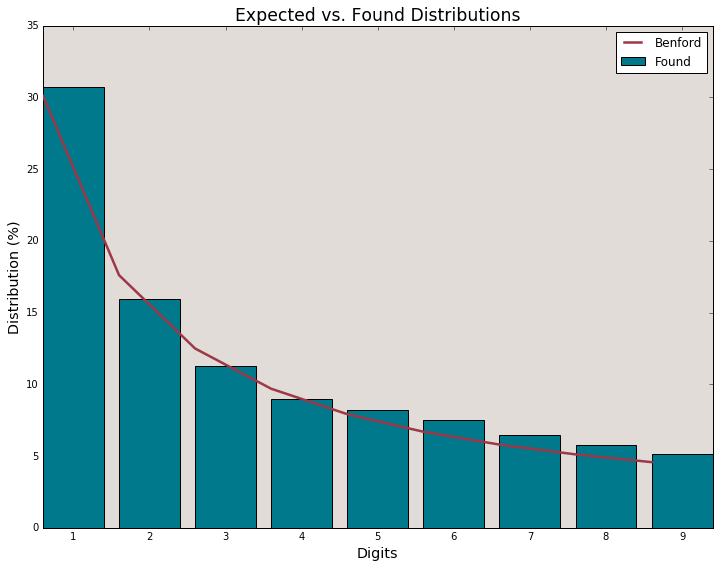

In [6]:
f1d = bf.first_digits(sp.l_r, digs=1, decimals=8)

#### The *first_digits* function draws the plot (default) with bars fot the digits found frequencies and a line corresponding to the expected Benford proportions. 

#### It also returns a DataFrame object with Counts, Found proportions and Expected values for each digit in the data studied.

In [7]:
f1d

,Counts,Found,Expected
First_1_Dig,,,
1,1832,0.306971,0.301030
2,950,0.159182,0.176091
3,675,0.113103,0.124939
4,535,0.089645,0.096910
5,491,0.082272,0.079181
6,449,0.075235,0.066947
7,385,0.064511,0.057992
8,343,0.057473,0.051153
9,308,0.051609,0.045757


## Expected distributions

### Let me first show you the representations of the BL expected distributions. These objects are used as example of what would be perfectly Benford-compliant datasets. The module also uses them under the hood as references for the analyses with real world data.

#### First digits

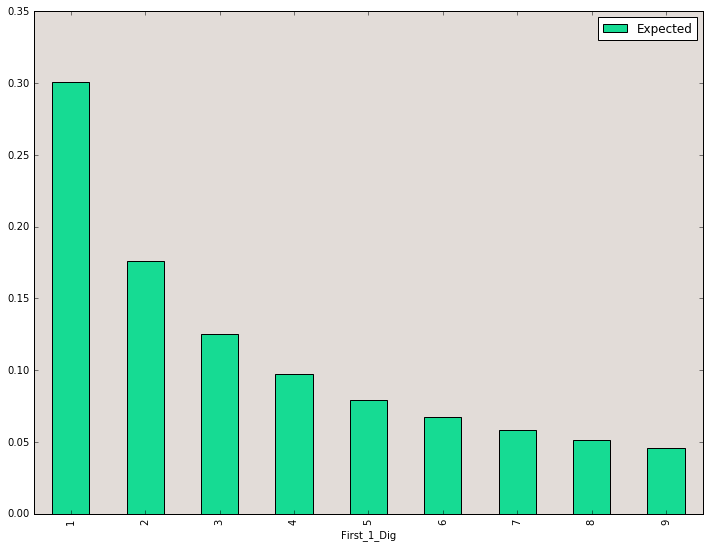

In [2]:
f1d = bf.First(1) # 1-9

In [3]:
f1d

,Expected
First_1_Dig,
1,0.301030
2,0.176091
3,0.124939
4,0.096910
5,0.079181
6,0.066947
7,0.057992
8,0.051153
9,0.045757


#### First two digits

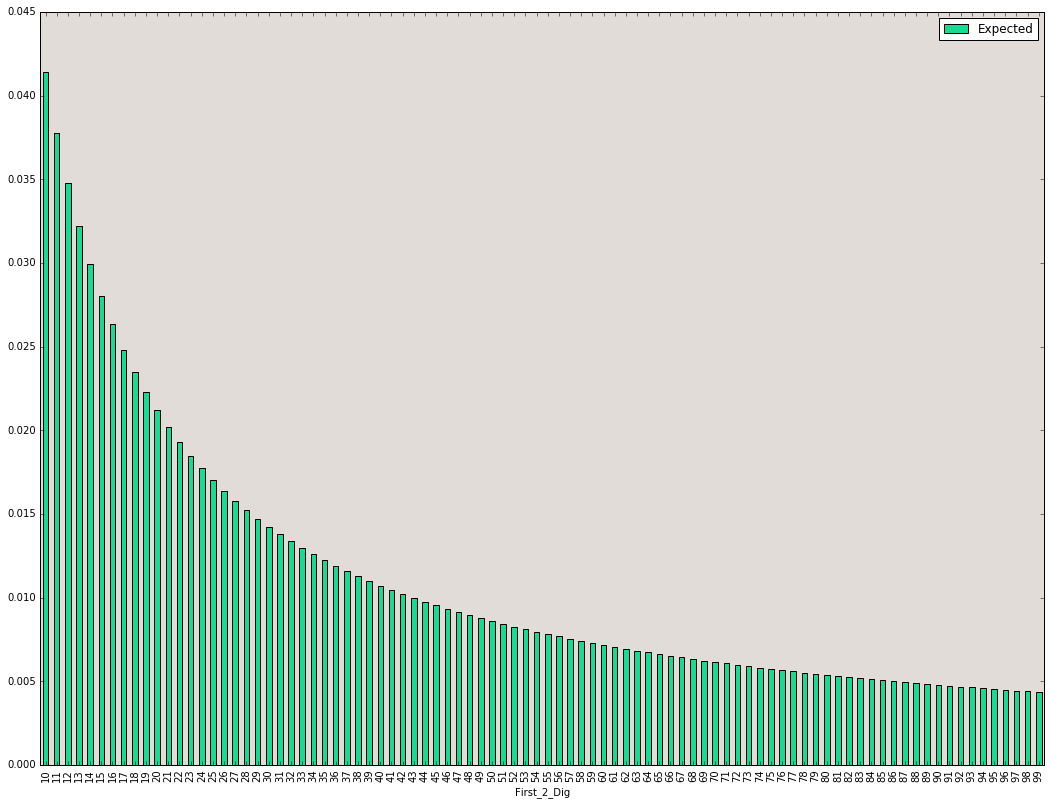

In [4]:
f2d = bf.First(2) # 10-99

In [5]:
f2d.head()

,Expected
First_2_Dig,
10,0.041393
11,0.037789
12,0.034762
13,0.032185
14,0.029963


In [6]:
f2d.tail()

,Expected
First_2_Dig,
95,0.004548
96,0.004501
97,0.004454
98,0.004409
99,0.004365


#### First three digits

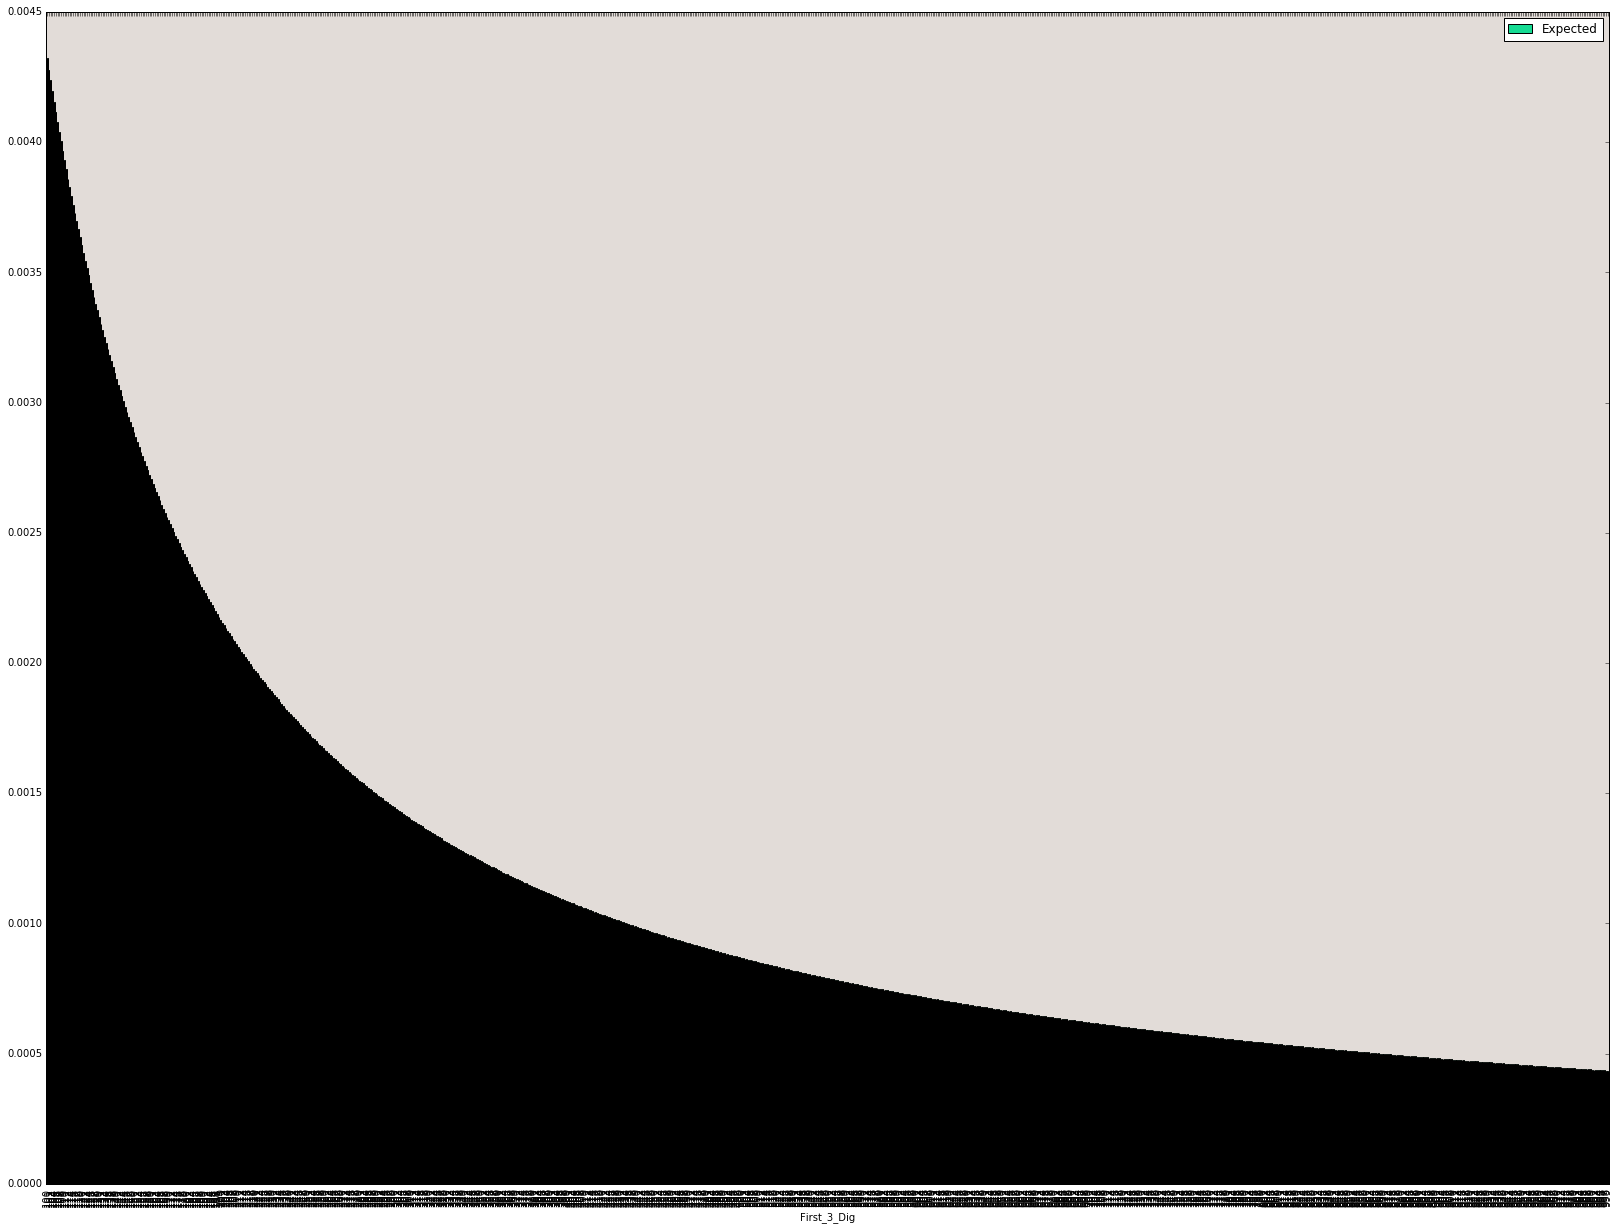

In [8]:
f3d = bf.First(3) # 100-999
#takes longer for matplotlib to draw all the bars, and is better visualized out of the notebook

In [10]:
f3d.tail()

,Expected
First_3_Dig,
995,0.000436
996,0.000436
997,0.000435
998,0.000435
999,0.000435


#### Second digits 

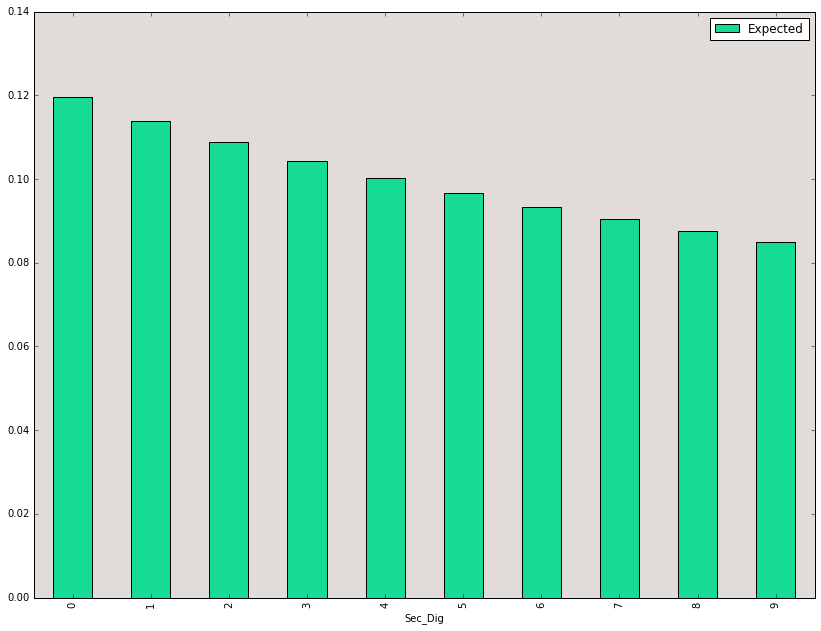

In [11]:
sd = bf.Second() # 0-9

#### Last two digits. These, as it tuns out, have a uniform distribution. The difference in proportion tends to disapear from the fourth digit on.

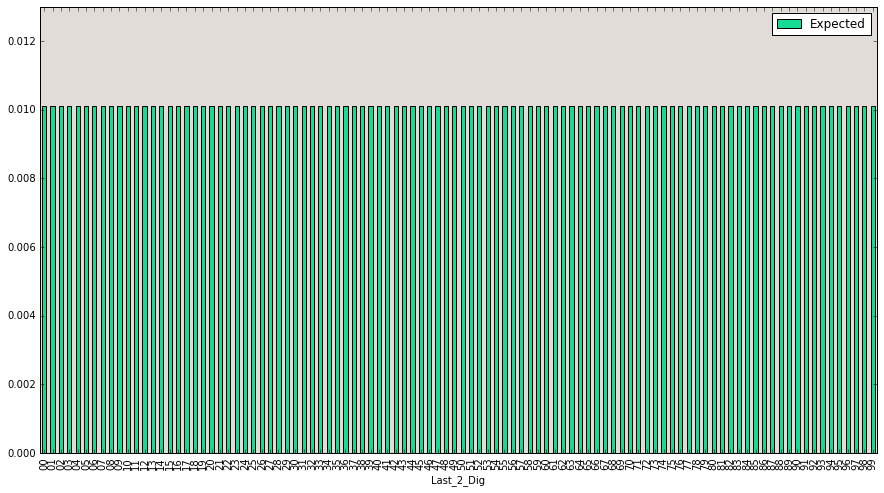

In [12]:
l2d = bf.LastTwo() # 00-99

In [13]:
l2d.head()

,Expected
Last_2_Dig,
00,0.010101
01,0.010101
02,0.010101
03,0.010101
04,0.010101


## Benford Analysis - S&P500 ETF market data. 

### To run the analysis, let us start with some easily accessible data. We are going to use the *pandas-datareader* package to download the S&P500 index ETF, the SPY.

In [15]:
import pandas_datareader.data as web

### Getting the data

In [16]:
sp = web.DataReader('SPY', 'yahoo', start='1990-01-01', end='2016-12-31') # get SPY quotes from yahoo! finance

In [17]:
sp.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200,28.000838
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500,28.199990
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300,28.259704
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400,28.558465
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500,28.677956


### We are going to analyse the SPY daily returns, so we need to add some computed columns.

In [19]:
#adding '_' to facilitate handling the column
sp.rename(columns={'Adj Close':'Adj_Close'}, inplace=True) 
sp['p_r'] = sp.Adj_Close/sp.Adj_Close.shift()-1        #simple returns
sp['l_r'] = np.log(sp.Adj_Close/sp.Adj_Close.shift())  #log returns
sp.tail()

,Open,High,Low,Close,Volume,Adj_Close,p_r,l_r
Date,,,,,,,,
2016-12-23,225.429993,225.720001,225.210007,225.710007,36251400,225.710007,0.001464,0.001463
2016-12-27,226.020004,226.729996,226.000000,226.270004,41054400,226.270004,0.002481,0.002478
2016-12-28,226.570007,226.589996,224.270004,224.399994,59776300,224.399994,-0.008265,-0.008299
2016-12-29,224.479996,224.889999,223.839996,224.350006,47719500,224.350006,-0.000223,-0.000223
2016-12-30,224.729996,224.830002,222.729996,223.529999,101301800,223.529999,-0.003655,-0.003662


### Now let's plot the histogram of the SPY *log returns*. It tends to a normal distribution. Note that we are not looking for the digits distribution yet.

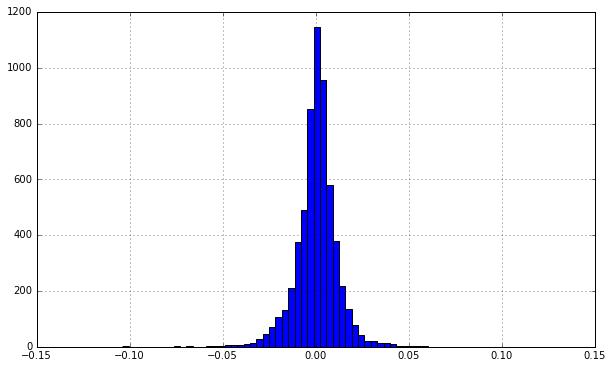

In [30]:
sp.l_r.hist(bins=70, figsize=(10,6))


### The main class in the benford module is the 'Analysis'. It takes a sequence of numbers and creates a pandas DataFrame with columns that refer to the digits and their position in each number.


### We will feed the Analysis class with the SPY log returns column. The *benford.Analysis* class takes a pandas Series, a pandas DataFrame column (which is a oandas Series), or a numpy 1D array.

In [31]:
a = bf.Analysis(sp.l_r, sign='all', dec=8) 

Initialized sequence with 5968 registries.


In [32]:
a.head()

,Seq,ZN
Date,,
1993-02-01,0.007087,708718
1993-02-02,0.002115,211527
1993-02-03,0.010516,1051648
1993-02-04,0.004175,417535
1993-02-05,-0.000696,69579


### This is the instantiation of the object that will be the base for all further tests.
### Some important notes about the parameters:
### <li>The "sign" parameter tells the module which numbers to consider, negative (neg), postive (pos) or both (all)</li>
### <li>The "dec" parameter tells the module how many decimal places to consider. The defalut is 2, for Analysis with currencies. In this case, since the log return has many decimal places, I set it to 8. If integer, set it to 0.</li>

### Now that we are all set, let us run the tests

#### First Digits Test


Test performed on 5968 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

             Expected     Found    Z_test
First_1_Dig                              
6            0.066947  0.075235  2.535845
8            0.051153  0.057473  2.187009
9            0.045757  0.051609  2.132196
7            0.057992  0.064511  2.126922

The Mean Absolute Deviation is 0.00800215861464
        For the First Digit:
        - 0.0000 to 0.006: Close Conformity
        - 0.006 to 0.012: Acceptable Conformity
        - 0.012 to 0.015: Marginally Acceptable Conformity
        - Above 0.015: Nonconformity


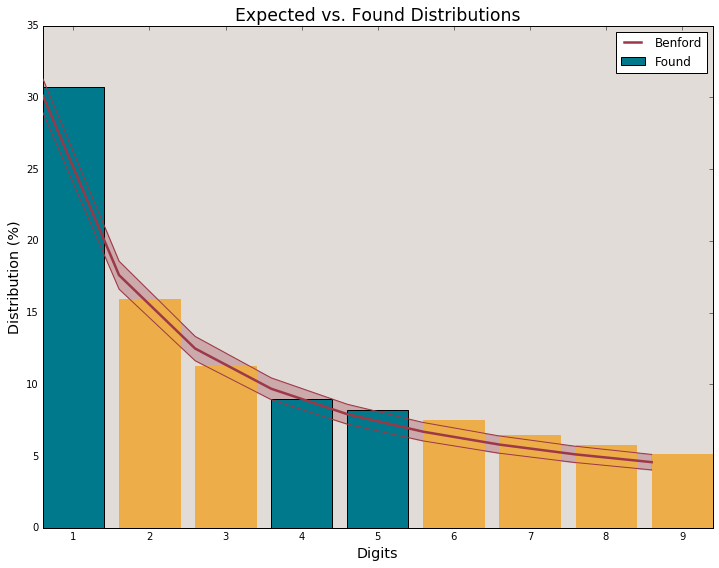

In [33]:
f1d = a.first_digits(1)

### Let us go through the results:
### 


Test performed on 5926 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant deviations are:

             Expected     Found    Z_test
First_1_Dig                              
2            0.176091  0.158623  3.513329
3            0.124939  0.113061  2.745665
6            0.066947  0.075262  2.535032
9            0.045757  0.051974  2.259212
8            0.051153  0.057543  2.203496
7            0.057992  0.064293  2.047502

The Mean Absolute Deviation is 0.00814461661944
For the First Digit:
    - 0.0000 to 0.006: Close Conformity
    - 0.006 to 0.012: Acceptable Conformity
    - 0.012 to 0.015: Marginally Acceptable Conformity
    - Above 0.015: Nonconformity


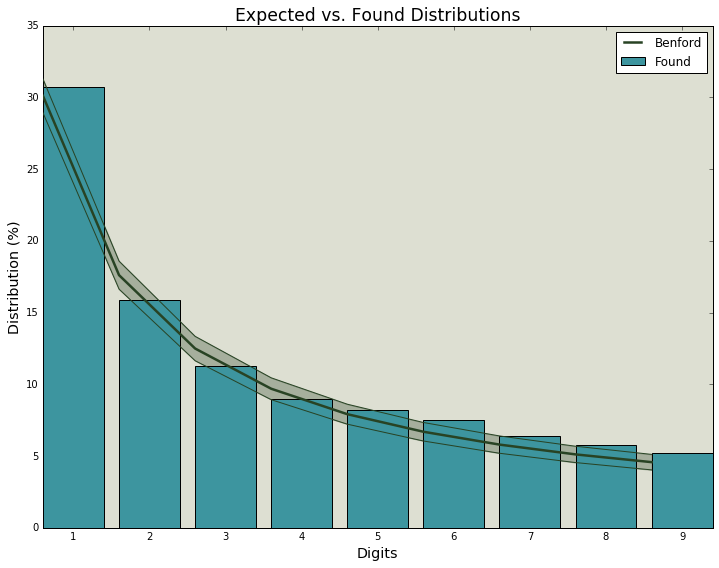

In [9]:
a.first_digits(1, conf_level=95, show_high_Z='all')


Test performed on 5926 registries.
Discarded 0 records < 10 after preparation.

The entries with the significant deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_test]
Index: []

The Mean Absolute Deviation is 0.00447150482018
    For the Second Digits:
    - 0.000 to 0.008: Close Conformity
    - 0.008 to 0.010: Acceptable Conformity
    - 0.010 to 0.012: Marginally Acceptable Conformity
    - Above 0.012: Nonconformity


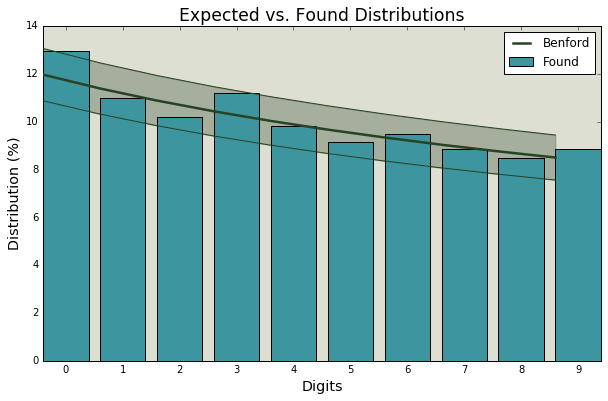

In [10]:
a.second_digit(conf_level=99, show_high_Z='all')#, limit_N=2500)


Test performed on 5926 registries.
Discarded 38 records < 100 after preparation.

The entries with the significant deviations are:

             Expected     Found    Z_test
First_3_Dig                              
952          0.000456  0.001529  3.550026
997          0.000435  0.001359  3.083834
823          0.000527  0.001529  3.062289
695          0.000624  0.001698  3.037940
962          0.000451  0.001359  2.972068
945          0.000459  0.001359  2.916663
139          0.003113  0.005265  2.846766
751          0.000578  0.001529  2.764104
171          0.002532  0.004416  2.745906
874          0.000497  0.001359  2.676629
101          0.004279  0.006624  2.656734
862          0.000504  0.001359  2.634577
343          0.001264  0.002548  2.587617
821          0.000529  0.001359  2.487337
587          0.000739  0.001698  2.468198
247          0.001755  0.000340  2.438688
802          0.000541  0.001359  2.417123
673          0.000645  0.001529  2.414509
671          0.000647  0.00

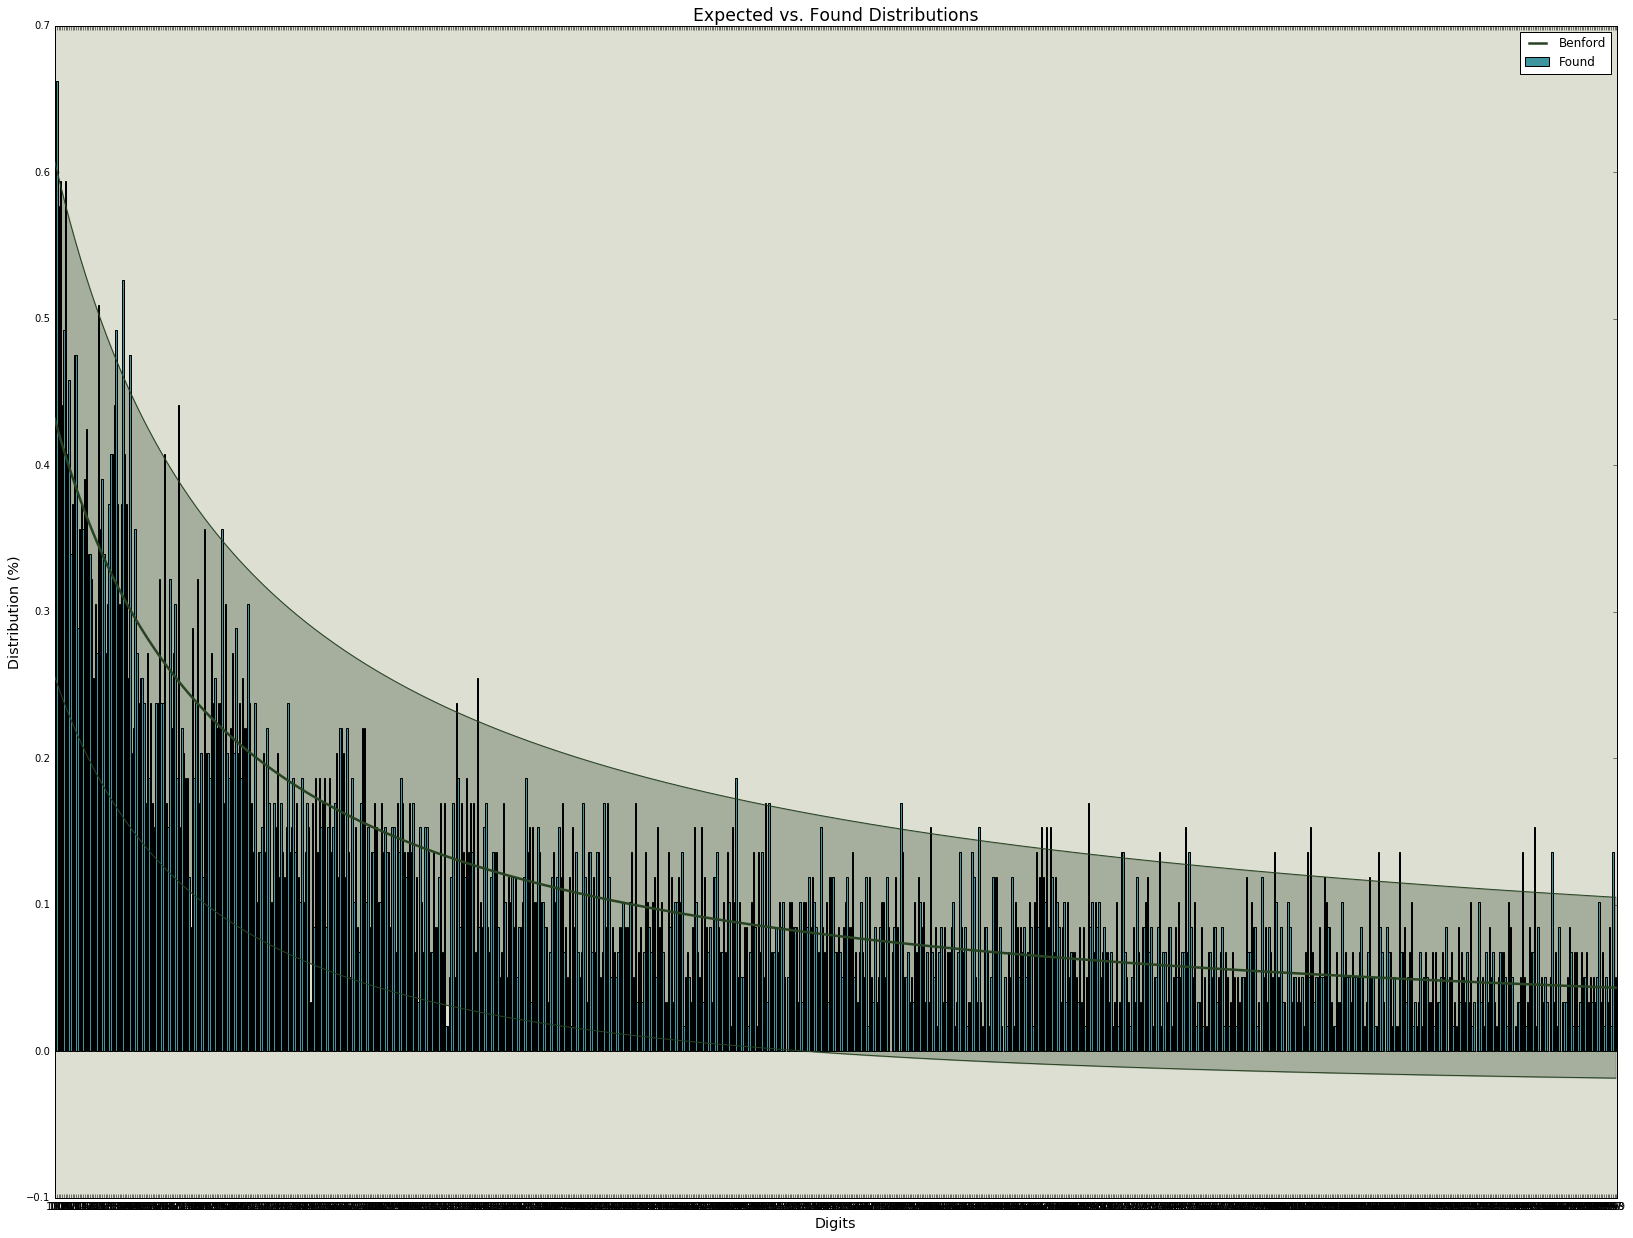

In [11]:
a.first_digits(3, conf_level=95, show_high_Z='all')


Test performed on 5926 registries.
Discarded 655 records < 1000 after preparation

The entries with the significant positive deviations are:

            Expected     Found    Z_test
Last_2_Dig                              
14          0.010101  0.013849  2.652634
19          0.010101  0.013849  2.652634
16          0.010101  0.013090  2.101654
89          0.010101  0.012901  1.963909


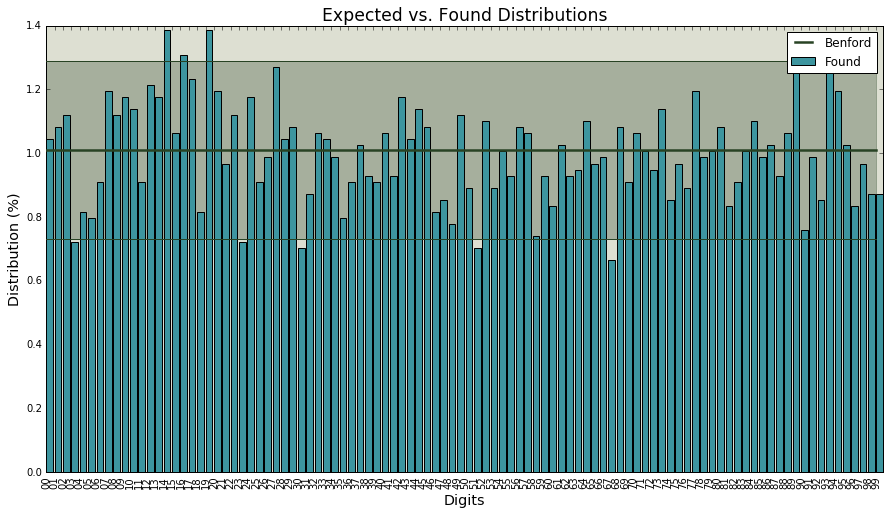

In [12]:
a.last_two_digits()

In [ ]:
s =a.summation(digs=2, top=5)

In [ ]:
a.groupby('L2D').sum()